In [15]:
from langgraph.graph import StateGraph,END
from typing import TypedDict

def search_agent(state):
    search_result = f"Searching for {state['query']}"
    state["search_result"] = search_result
    return state

def summarize_agent(state):
    search_result = state["search_result"]
    summary_result = f"Summarizing {search_result}"
    state["summary_result"] = summary_result
    return state

In [16]:
class GraphState(TypedDict):
    query:str
    search_result:str
    summary_result:str

workflow = StateGraph(state_schema=GraphState)

# Nodes
workflow.add_node('search',search_agent)
workflow.add_node('summarize',summarize_agent)

# Edges 
workflow.set_entry_point('search')
workflow.add_edge('search','summarize')
workflow.add_edge('summarize',END)

app = workflow.compile()


In [17]:
result = app.invoke({"query": "Explain LangGraph"})
print(result)

{'query': 'Explain LangGraph', 'search_result': 'Searching for Explain LangGraph', 'summary_result': 'Summarizing Searching for Explain LangGraph'}


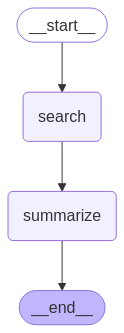

In [21]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [2]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END 
from langgraph.graph.message import add_messages
from langchain_ollama import ChatOllama
from langchain_core.messages import BaseMessage, HumanMessage

In [9]:
class State(TypedDict):
    messages: Annotated[list[BaseMessage], add_messages]

model = ChatOllama(model="llama3.2:1b")

def chatbot(state: State):
    response = model.invoke(state["messages"])
    return {"messages": [response]}

workflow = StateGraph(State)
workflow.add_node("chatbot", chatbot)
workflow.add_edge(START, "chatbot")
workflow.add_edge("chatbot", END)
app = workflow.compile()

In [27]:
def chat_once(message, history=[]):
    if not history:
        history = []
    
    history.append(HumanMessage(content=message))
    result = app.invoke({"messages": history})
    bot_message = result["messages"][-1]
    history.append(bot_message)
    
    return bot_message.content, history

# Now you can use it in notebook cells like this:
response, history = chat_once("Hello!")
print(f"Bot: {response}")

# For next messages:
response, history = chat_once("How are you?", history)
print(f"Bot: {response}")

Human: Hello!
Bot: Hello! How can I assist you today?
Human: How are you?
Bot: I'm doing well, thanks for asking. It's nice to have a chance to chat with you. Is there anything on your mind that you'd like to talk about, or are you just looking for some small talk? I'm here to listen and help if I can.


In [28]:
message,response, history = chat_once("abe chal na?", history)
print(f"Human: {message}")
print(f"Bot: {response}")

Human: abe chal na?
Bot: It seems like you were trying to say "abhi chala na?" which is a common Indian expression that means "just then" or "after this". Is there something specific you'd like to discuss or ask, or would you rather just enjoy the moment and see where it takes us?


In [29]:
for chat in history:
    ## check if human or bot
    if chat.type == "human":
        print(f"Human: {chat.content}")
    else:
        print(f"Bot: {chat.content}")



Human: Hello!
Bot: Hello! How can I assist you today?
Human: How are you?
Bot: I'm doing well, thanks for asking. It's nice to have a chance to chat with you. Is there anything on your mind that you'd like to talk about, or are you just looking for some small talk? I'm here to listen and help if I can.
Human: abe chal na?
Bot: It seems like you were trying to say "abhi chala na?" which is a common Indian expression that means "just then" or "after this". Is there something specific you'd like to discuss or ask, or would you rather just enjoy the moment and see where it takes us?


In [ ]:
print(result["messages"][-1].content)

The capital of France is Paris.


In [40]:
print(result["messages"])

[HumanMessage(content='What is the capital of France?', additional_kwargs={}, response_metadata={}, id='706586bf-9cdf-4a0f-8312-e81235ea862d'), AIMessage(content='The capital of France is Paris.', additional_kwargs={}, response_metadata={'model': 'qwen2.5:3b', 'created_at': '2025-04-05T20:55:30.173716Z', 'done': True, 'done_reason': 'stop', 'total_duration': 2027959900, 'load_duration': 78427100, 'prompt_eval_count': 36, 'prompt_eval_duration': 1288000000, 'eval_count': 8, 'eval_duration': 600000000, 'message': Message(role='assistant', content='', images=None, tool_calls=None)}, id='run-0491ffd0-98dd-4418-a718-a2bd16988c41-0', usage_metadata={'input_tokens': 36, 'output_tokens': 8, 'total_tokens': 44})]


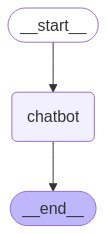

In [30]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))